In [89]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split,cross_val_score,KFold
from sklearn.preprocessing import StandardScaler,PowerTransformer
from sklearn.linear_model import LinearRegression,Ridge,Lasso,ElasticNet
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.linear_model import RidgeCV
import pickle

In [ ]:
df=pd.read_csv('concrete_data.csv')
df.head()

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   cement                         1030 non-null   float64
 1   blast_furnace_slag             1030 non-null   float64
 2   fly_ash                        1030 non-null   float64
 3   water                          1030 non-null   float64
 4   superplasticizer               1030 non-null   float64
 5   coarse_aggregate               1030 non-null   float64
 6   fine_aggregate                 1030 non-null   float64
 7   age                            1030 non-null   int64  
 8   concrete_compressive_strength  1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.6 KB


In [ ]:
df.isnull().sum()

,0
cement,0
blast_furnace_slag,0
fly_ash,0
water,0
superplasticizer,0
coarse_aggregate,0
fine_aggregate,0
age,0
concrete_compressive_strength,0


In [ ]:
df.duplicated().sum()

np.int64(25)

In [ ]:
df.shape

(1030, 9)

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.shape

(1005, 9)

In [ ]:
df['cement'].unique()

array([540. , 332.5, 198.6, 266. , 380. , 475. , 427.5, 190. , 304. ,
       139.6, 342. , 237.5, 349. , 310. , 485. , 374. , 313.3, 425. ,
       375. , 469. , 388.6, 531.3, 318.8, 401.8, 362.6, 323.7, 379.5,
       286.3, 439. , 389.9, 337.9, 222.4, 233.8, 194.7, 190.7, 212.1,
       230. , 190.3, 166.1, 168. , 213.7, 213.8, 229.7, 238.1, 250. ,
       212.5, 212.6, 212. , 231.8, 251.4, 181.4, 182. , 168.9, 290.4,
       277.1, 295.7, 251.8, 249.1, 252.3, 246.8, 275.1, 297.2, 213.5,
       277.2, 218.2, 214.9, 218.9, 376. , 500. , 315. , 505. , 451. ,
       516. , 520. , 528. , 385. , 500.1, 450.1, 397. , 333. , 334. ,
       405. , 200. , 145. , 160. , 234. , 285. , 356. , 275. , 165. ,
       178. , 167.4, 172.4, 173.5, 167. , 173.8, 446. , 387. , 355. ,
       491. , 424. , 202. , 284. , 359. , 436. , 289. , 393. , 480. ,
       255. , 158.8, 239.6, 238.2, 181.9, 193.5, 255.5, 272.8, 220.8,
       382.5, 210.7, 295.8, 203.5, 381.4, 228. , 316.1, 135.7, 339.2,
       290.2, 170.3,

In [ ]:
df['blast_furnace_slag'].unique()

array([  0. , 142.5, 132.4, 114. ,  95. ,  47.5, 190. ,  76. , 209.4,
        38. , 237.5, 189.2, 262.2, 106.3,  93.8, 118.8, 117.2,  97.1,
       212.5,  94.7, 189. , 282.8, 151.2, 200.9, 177. ,  42.1,  98.1,
        45.2,  42.2,  97.8,  54.6,  53.8, 137. ,  50. ,  17.2,  17.5,
        17.6, 200. , 116. , 128. , 156. , 180. , 119. , 128.5, 129.8,
       129.9,  13.6,  50.1,  75.4,  93.4,  24. ,  20. ,  19. ,  26. ,
        22. ,  11. ,  15. , 238.2, 359.4, 158.8, 272.8, 290.2, 170.3,
       181.9, 147.2, 316.1, 135.7, 342.1, 210.7, 203.5, 193.5, 155.5,
       124.1, 305.3, 166.8, 236. , 212. , 250.2, 183.9, 122.6, 153. ,
       133. , 162.4, 173. , 288. , 102. , 192. , 157. , 141.3, 105. ,
       144. , 115. , 178. , 143. , 140. , 149. , 239. , 167. , 164. ,
       187. , 129. ,  97. , 243. , 188. , 121. , 166. , 207. , 111. ,
       250. , 260. , 139. , 100. ,  92. , 183. , 230. , 210. , 145. ,
       118. , 169. , 101. , 161. , 120. , 237. , 170. , 112. , 136. ,
       117. , 184. ,

In [ ]:
df['fly_ash'].unique()

array([  0. ,  96.7,  94.6, 100.5, 125.4, 121.6, 118.3, 125.2, 163.3,
       163.8,  24.5, 118.2,  94.1,  95.7, 100.4, 124.8, 167. , 122. ,
       124.3,  96.2,  97.4,  95.6,  99.9,  98.8, 125.1, 121.4, 117.5,
       174.7, 174.2, 123.8, 121.9, 124.1,  59. ,  60. , 136. , 158. ,
       163. , 119. ,  95. , 120. , 143.6, 132.1, 118.6, 128.6, 172.4,
       173.5, 159.9,  79. ,  94. ,  97. , 123. , 132. , 141. ,  82. ,
       148. , 112. ,  89. , 139. , 111. , 175. , 116. , 100. , 184. ,
       130. , 107. ,  76. , 150. , 146. , 126. , 142. , 161. , 200. ,
       113. , 128. ,  86. ,  90. , 109. ,  78. ,  71. , 103. , 137. ,
       138. , 195. , 185. ,  92. , 143. , 134. , 133. , 166. ,  87. ,
       106. , 182. ,  91. , 179. ,  77. , 172. ,  98. , 164. , 152. ,
       194. , 193. , 190. , 187. ,  71.5, 106.7, 111.9, 103.3, 119.8,
       136.6, 137.9,  86.1, 194.9, 185.3,  89.6,  91.7, 142.7,  78.4,
       133.6, 132.6, 142.8, 165.7,  87.5, 113.2, 106.2, 182.1, 107.5,
       143.2, 178.9,

In [ ]:
df['water'].unique()

array([162. , 228. , 192. , 146. , 170.1, 175.5, 153.5, 151.4, 126.6,
       181.1, 137.8, 157.9, 141.8, 155.7, 147.4, 164.9, 183.8, 153.9,
       144.7, 186. , 145.9, 174.9, 189.3, 197.9, 165.6, 162.1, 180.3,
       195.5, 161.9, 176.5, 121.8, 181.7, 195.2, 186.7, 187.4, 159.3,
       159.4, 159. , 174. , 188.5, 169.6, 170.2, 158.3, 168.1, 160.6,
       171.5, 146.1, 158.1, 146.3, 143.3, 159.5, 174.8, 154.8, 154.6,
       160.7, 140.8, 155.6, 158.5, 214.6, 140. , 142. , 145. , 195. ,
       165. , 170. , 185. , 175. , 158. , 200. , 167. , 189. , 190. ,
       184. , 182. , 163. , 160. , 151. , 163.8, 175.1, 179.9, 156.8,
       164.8, 164. , 172.3, 166.6, 191.8, 159.2, 192.9, 157. , 210. ,
       201. , 178. , 168. , 206. , 179. , 154. , 218. , 185.7, 197. ,
       194. , 193. , 191. , 198. , 180. , 181. , 183. , 187. , 203.5,
       173. , 203. , 220. , 202. , 214. , 196. , 172. , 188. , 237. ,
       177. , 176. , 247. , 221. , 212. , 199. , 171. , 127. , 216. ,
       213. , 246.9,

In [ ]:
df['superplasticizer'].unique()

array([ 2.5,  0. , 10.1,  8.6, 16.5, 18.6, 23.4,  8.9, 32.2, 12.1, 28.2,
       14.3, 11.4, 11.6, 10.3, 15.9, 11.2, 11.1, 22. ,  9.5,  4.5,  4.6,
        7.5,  7.8,  5.7,  9.9,  6.9,  6.7,  6.1,  7. ,  5.5,  8.7, 10.4,
        5.8,  6.4,  7.6,  8.2, 10.8,  9.4, 11.8, 12.4, 12.8, 14.2, 12. ,
       10.2, 11.7, 11.9,  9.6, 11.3,  4. ,  1.9,  5.9,  5.2, 20. ,  3. ,
       20.8, 17.9, 15.3,  8.3,  9. ,  8.1,  3.6,  4.1,  6.5,  7.9,  9.7,
        5.3, 13.9, 13.1, 12.3,  3.9,  8.5,  1.7, 10.9, 19. , 10. , 18. ,
        6. , 15. , 11. ,  5. ,  8. , 13. , 16. ,  2. ,  9.1,  3.4, 10.5,
        3.1,  7.4, 12.6, 16.1, 15.6, 10.6,  7.1,  8.4,  7.2,  9.2,  2.2,
       18.8,  8.8, 18.3, 22.1,  6.2,  6.3,  9.8,  6.6, 10.7, 11.5, 12.2,
       12.7])

In [ ]:
df['coarse_aggregate'].unique()

array([1040. , 1055. ,  932. ,  978.4, 1047. ,  971. , 1120. ,  926.1,
       1046.9,  852.1,  936. ,  946.8,  944.7,  942.7, 1134.3, 1004.6,
        884.9,  967.1,  947. , 1006.4, 1090. , 1057.6, 1029.4, 1088.1,
       1058.6, 1058.7, 1065.8, 1066. , 1028.1,  949.9,  956.9, 1007.8,
       1003.8, 1085.4, 1056.4, 1028.4, 1055.6, 1059.4, 1080.8,  961.2,
        973.9,  955.1, 1006. ,  987.8, 1086.8, 1053.6, 1022.8, 1053.5,
       1052.3, 1061.7, 1075.7, 1014.3, 1078.7, 1003.5,  966. , 1098. ,
       1130. , 1030. ,  801. ,  855. ,  920. ,  870. ,  903. , 1124.4,
        967. ,  996. , 1145. ,  833. ,  824. ,  981. ,  860. , 1044. ,
       1031. , 1061. ,  830. , 1033. , 1005.6, 1005.8, 1007.3, 1006.3,
       1006.2, 1007.2, 1079. ,  948.9, 1043.6,  998. ,  938. ,  882. ,
        822. ,  942. ,  842. ,  838.4,  913.2,  940.6,  936.2,  931.2,
        889.8, 1040.6,  941.6, 1012.4,  998.2, 1026.6, 1047.8,  977. ,
       1091.4, 1076.2, 1104.6,  955.8, 1118.8, 1069.2, 1083.4, 1111.6,
      

In [ ]:
df.columns

Index(['cement', 'blast_furnace_slag', 'fly_ash', 'water', 'superplasticizer',
       'coarse_aggregate', 'fine_aggregate ', 'age',
       'concrete_compressive_strength'],
      dtype='object')

In [ ]:
df=df.rename(columns={'fine_aggregate ':'fine_aggregate'})

In [ ]:
df['fine_aggregate'].unique()

array([676. , 594. , 825.5, 670. , 806.9, 850.6, 800. , 756.7, 611.8,
       887.1, 803.7, 992.6, 781.5, 840.5, 925.7, 893.7, 880.4, 852.1,
       755.8, 659.9, 605. , 707.9, 870.3, 852.2, 905.9, 804. , 779.3,
       758.6, 802.6, 780.1, 785.4, 785.5, 757.6, 847. , 861.2, 903.6,
       903.8, 799.5, 778.5, 757.7, 777.8, 780.7, 796.2, 865. , 875.6,
       859.2, 899.8, 889. , 800.9, 777.5, 753.5, 776.4, 775.5, 782.5,
       792.7, 780.6, 794.9, 762.4, 853. , 641. , 745. , 630. , 802. ,
       855. , 720. , 805. , 768. , 613.2, 633. , 652. , 695. , 660. ,
       880. , 879. , 760. , 662. , 685. , 657. , 765. , 655. , 900.9,
       746.6, 746.8, 856.4, 793.5, 770.1, 798.9, 857.2, 771.9, 901.8,
       754.3, 712. , 845. , 871. , 699. , 750. , 801. , 719.7, 895.3,
       785.6, 712.2, 842.6, 945. , 734.3, 664.3, 714.3, 704.3, 724.3,
       744.3, 739.3, 689.3, 769.3, 759.3, 784.3, 674.3, 789.3, 764.3,
       781. , 885. , 856. , 863. , 812. , 833. , 783. , 808. , 795. ,
       758. , 820. ,

In [ ]:
df['age'].unique()

array([ 28, 270, 365, 360,  90, 180,   3,   7,  56,  91,  14, 100, 120,
         1])

In [ ]:
df['concrete_compressive_strength'].unique()

array([79.99, 61.89, 40.27, 41.05, 44.3 , 47.03, 43.7 , 36.45, 45.85,
       39.29, 38.07, 28.02, 43.01, 42.33, 47.81, 52.91, 39.36, 56.14,
       40.56, 42.62, 41.84, 28.24,  8.06, 44.21, 52.52, 53.3 , 41.15,
       52.12, 37.43, 38.6 , 55.26, 41.72, 42.13, 53.69, 38.41, 30.08,
       37.72, 42.23, 36.25, 50.46, 39.  , 53.1 , 41.54, 35.08, 15.05,
       40.76, 26.26, 32.82, 39.78, 46.93, 33.12, 49.19, 14.59, 14.64,
       41.93,  9.13, 50.95, 33.02, 54.38, 51.73,  9.87, 50.66, 48.7 ,
       55.06, 44.7 , 30.28, 40.86, 71.99, 34.4 , 28.8 , 33.4 , 36.3 ,
       29.  , 37.8 , 40.2 , 28.1 , 41.3 , 25.2 , 41.1 , 35.3 , 28.3 ,
       28.6 , 24.4 , 39.3 , 40.6 , 24.1 , 46.2 , 42.8 , 49.2 , 46.8 ,
       45.7 , 55.6 , 54.9 , 34.9 , 46.9 , 54.1 , 55.9 , 49.8 , 47.1 ,
       38.  , 56.1 , 59.09, 22.9 , 35.1 , 61.09, 59.8 , 60.29, 61.8 ,
       56.7 , 68.3 , 66.9 , 50.7 , 56.4 , 55.5 , 68.5 , 71.3 , 74.7 ,
       52.2 , 67.7 , 66.  , 74.5 , 49.9 , 63.4 , 64.9 , 64.3 , 60.2 ,
       72.3 , 69.3 ,

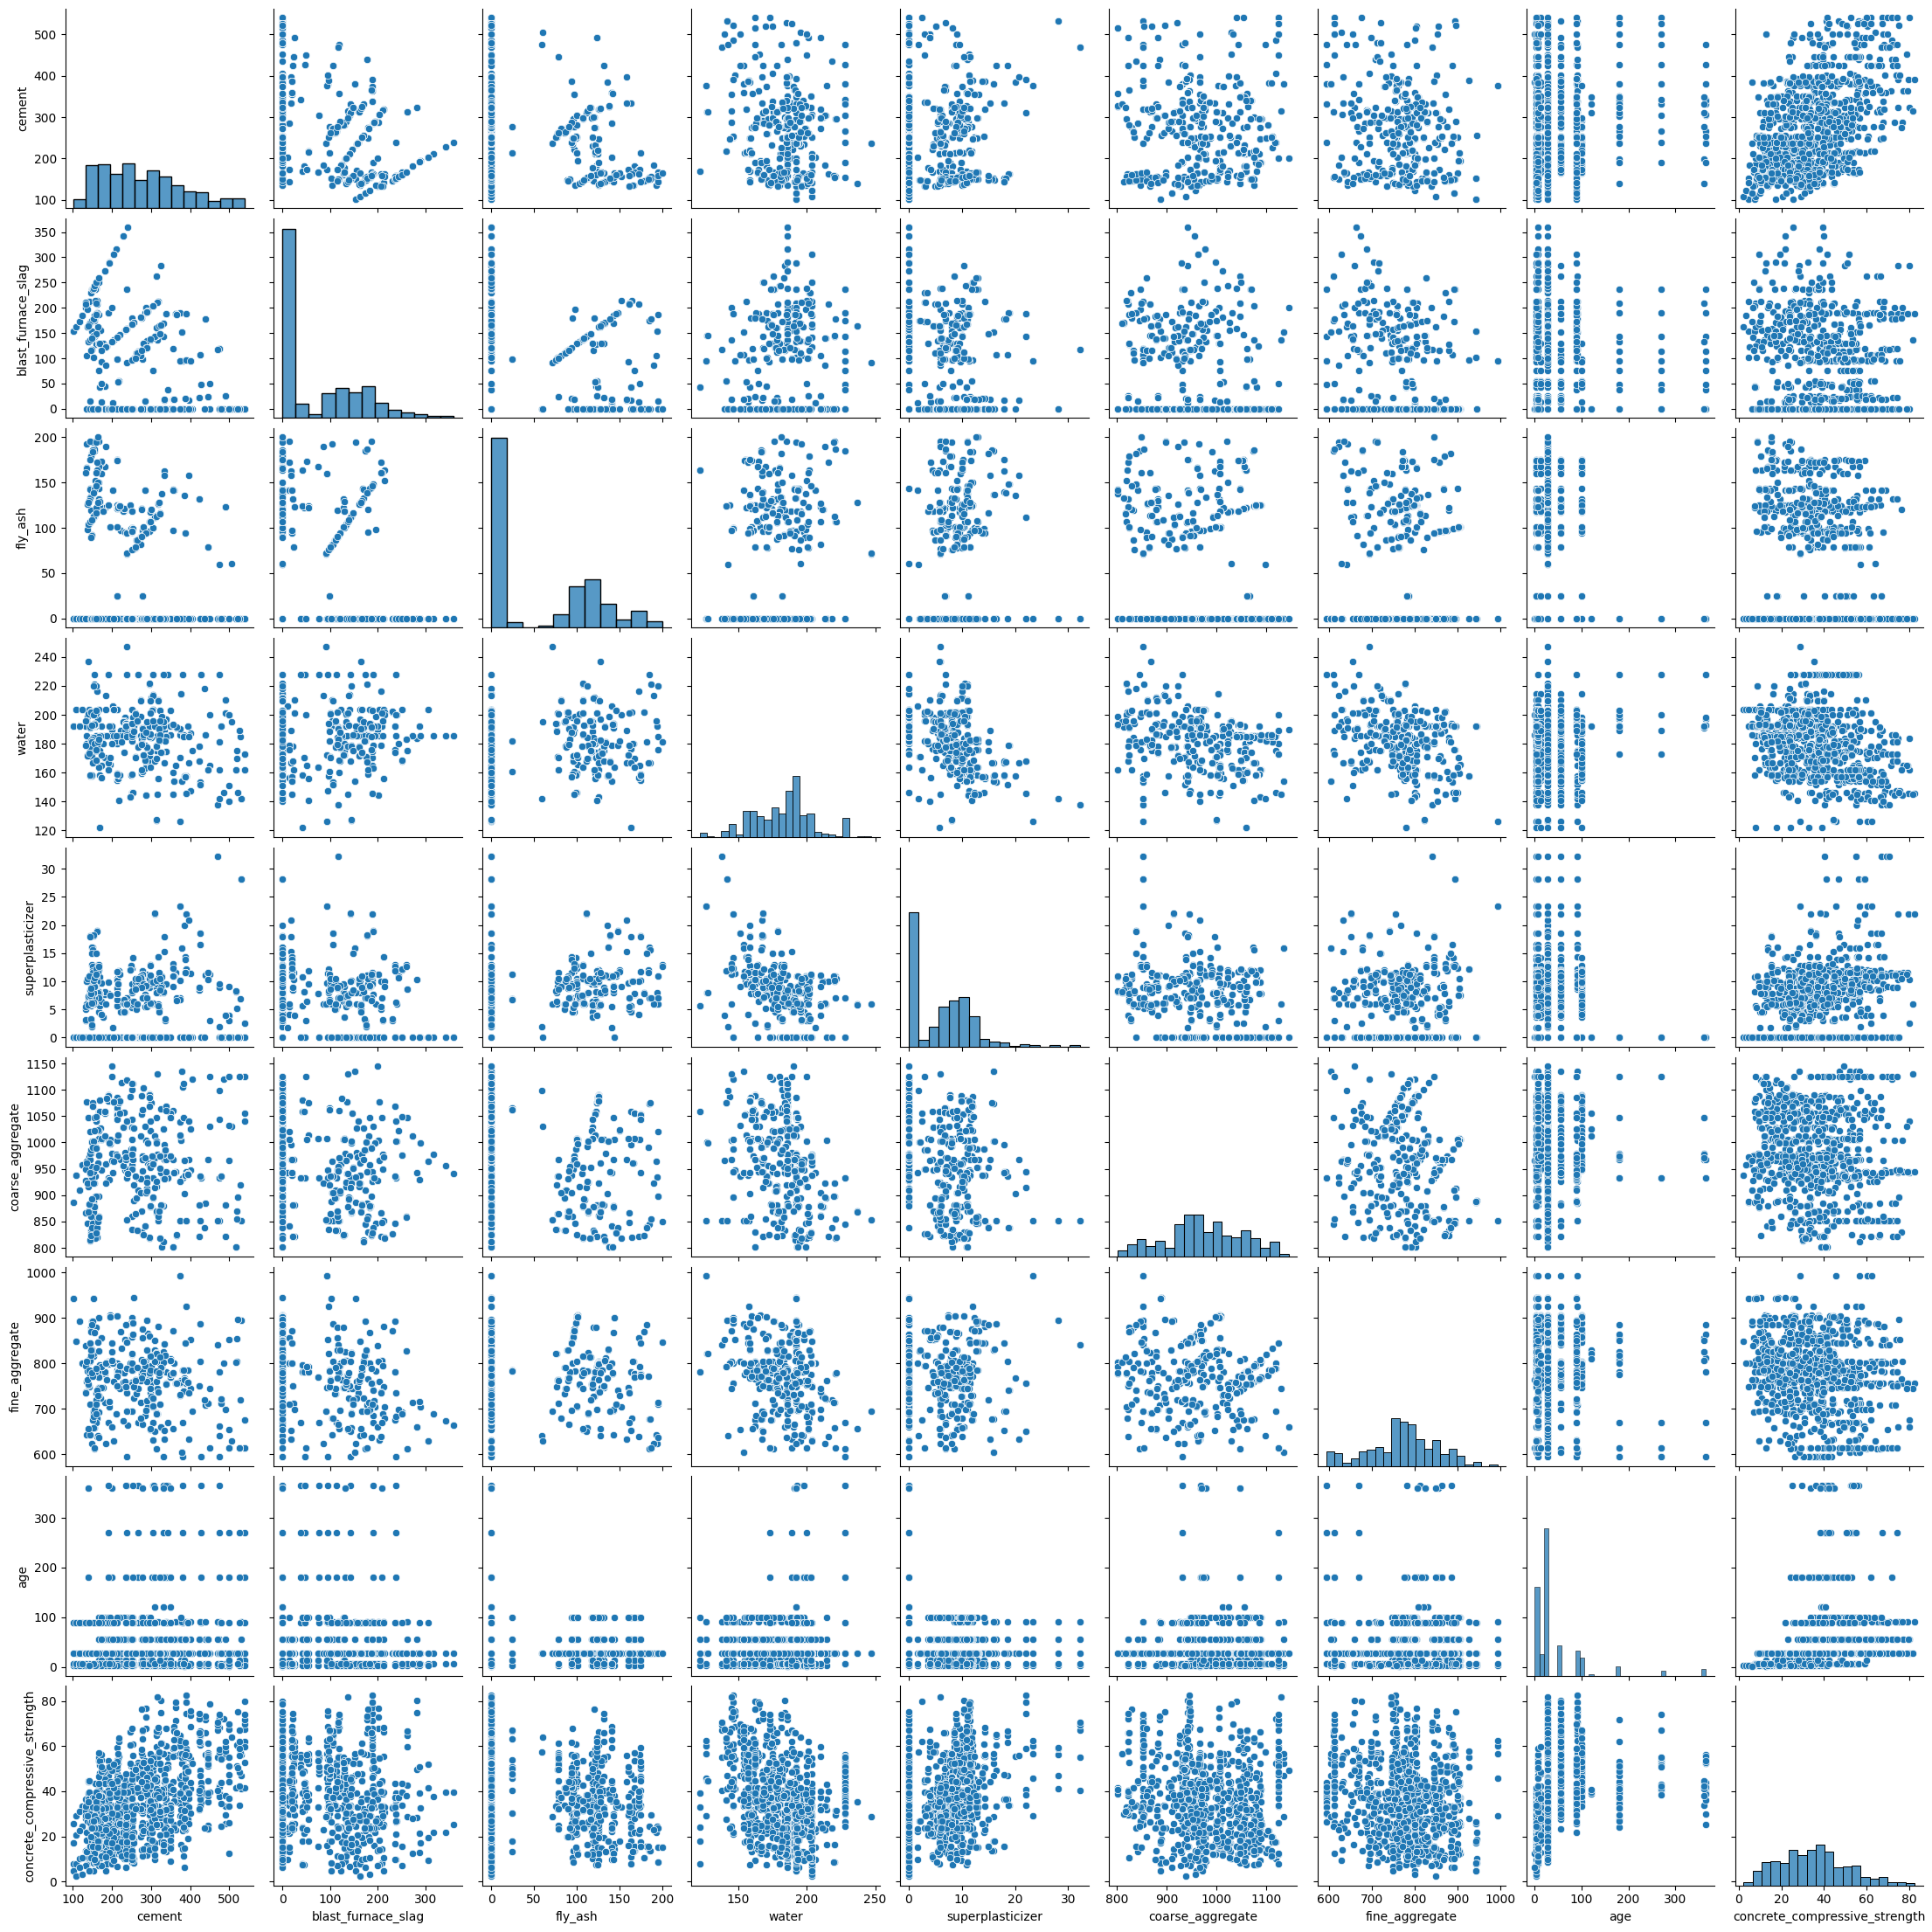

In [ ]:
sns.pairplot(df)

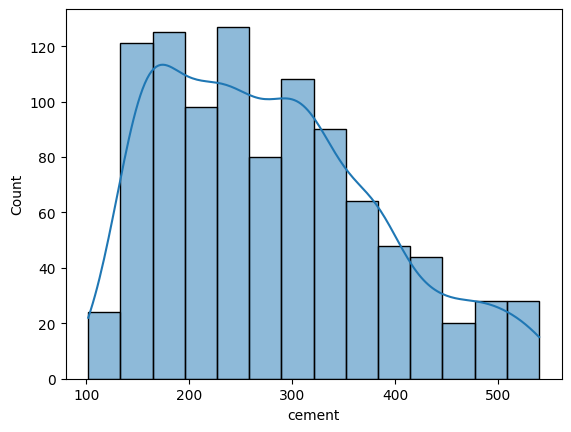

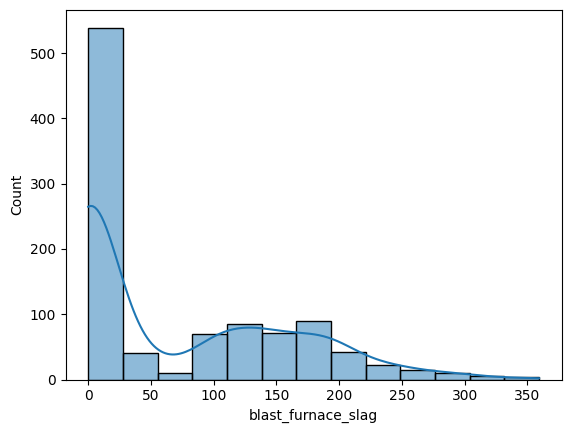

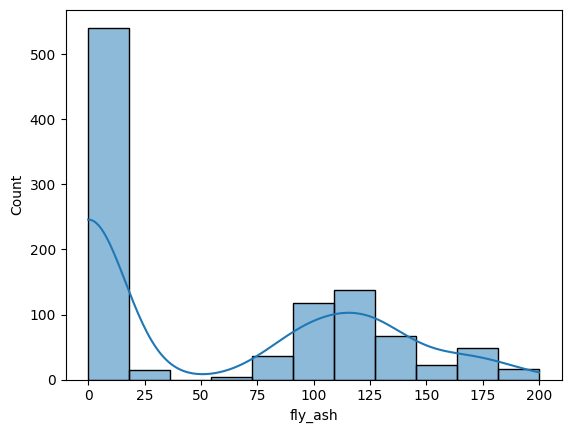

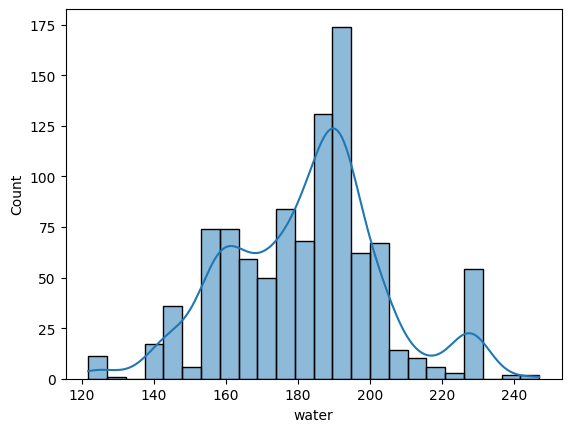

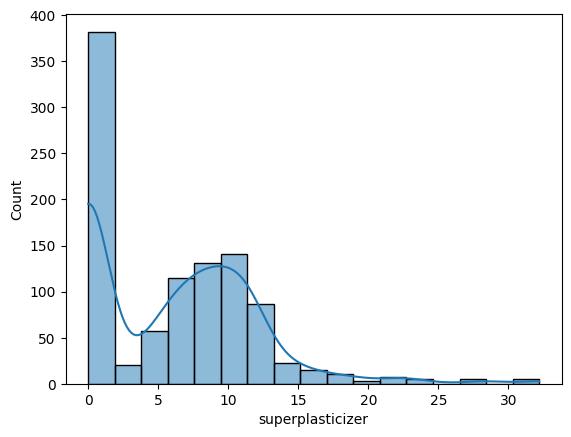

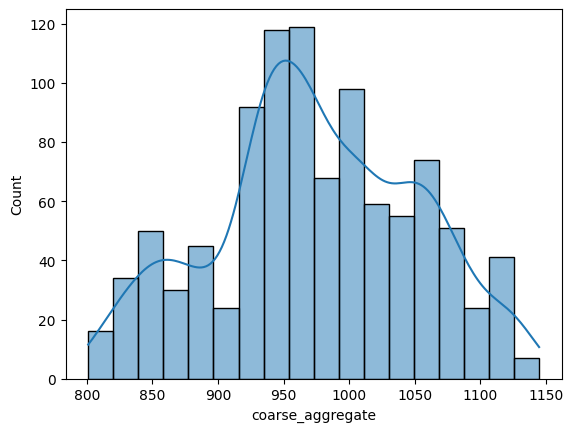

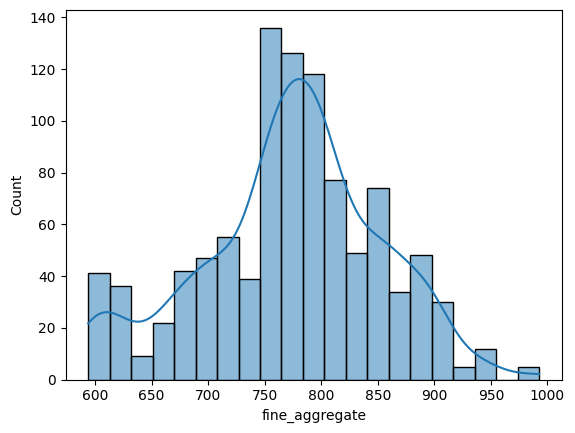

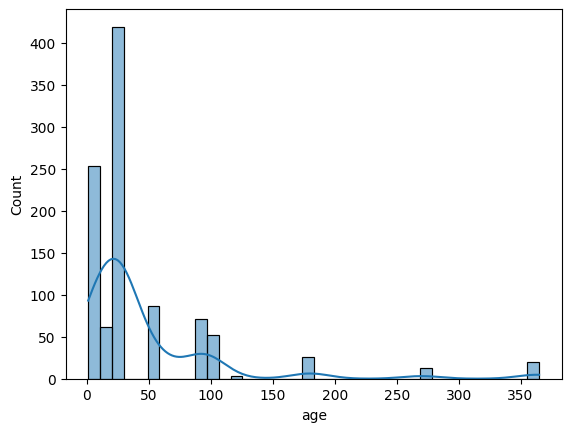

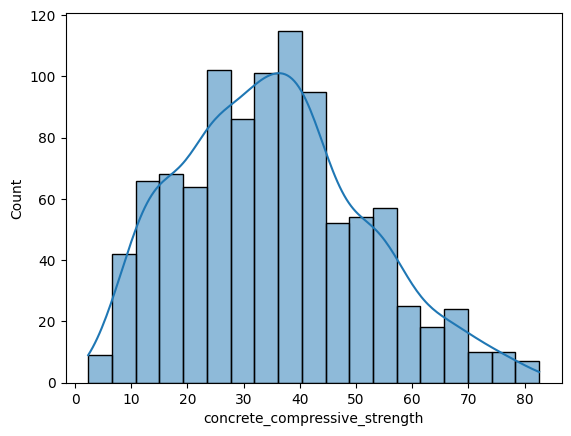

In [ ]:
for i in df.columns:
  sns.histplot(data=df,x=i,kde=True)
  plt.show()

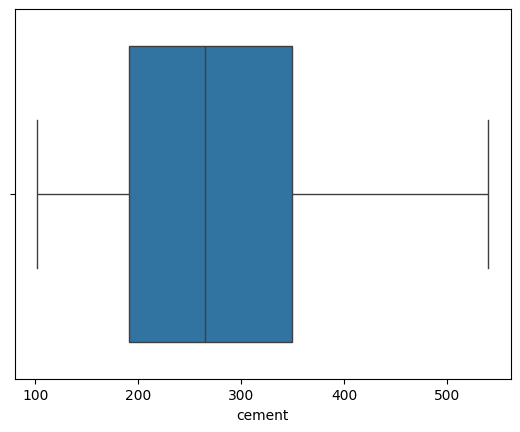

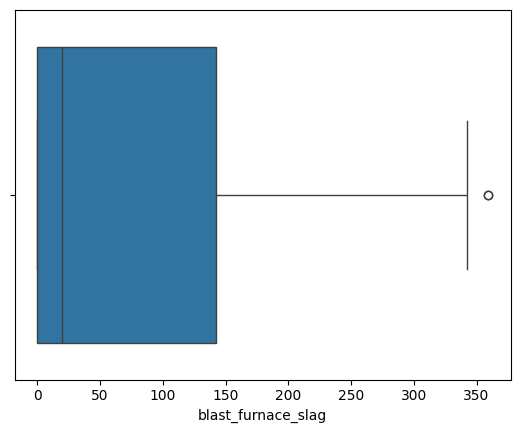

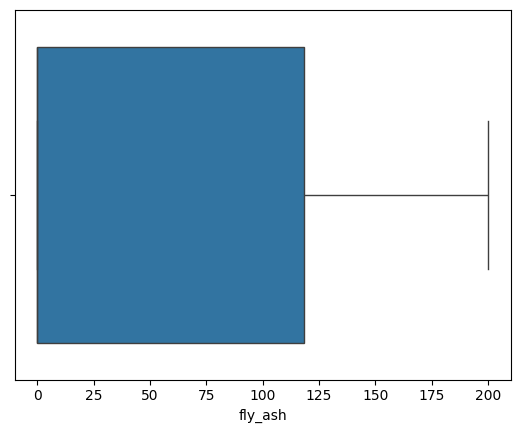

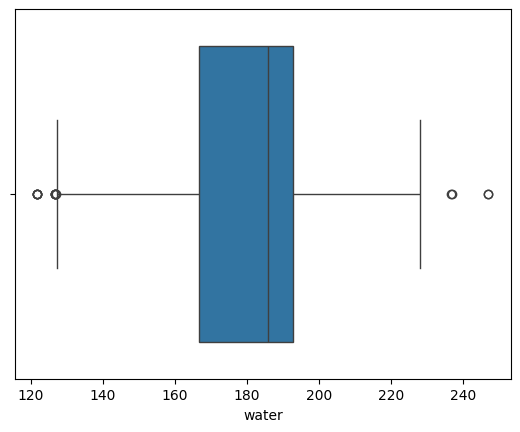

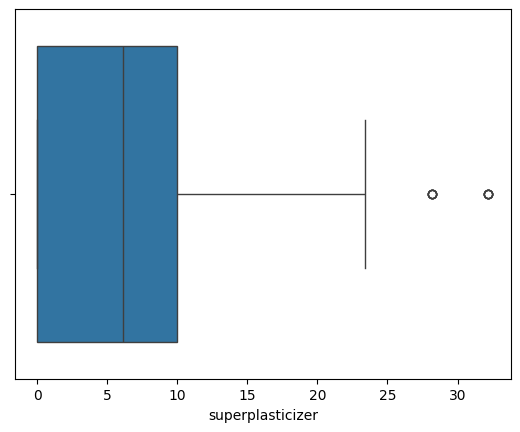

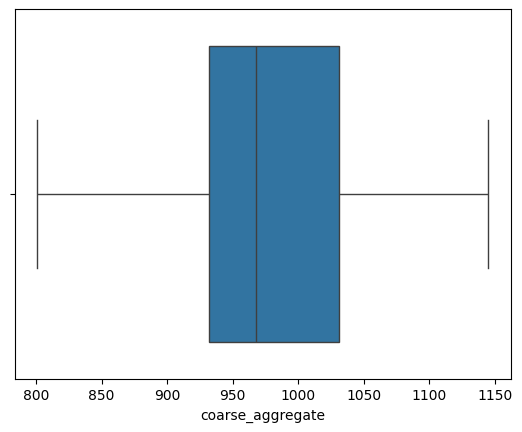

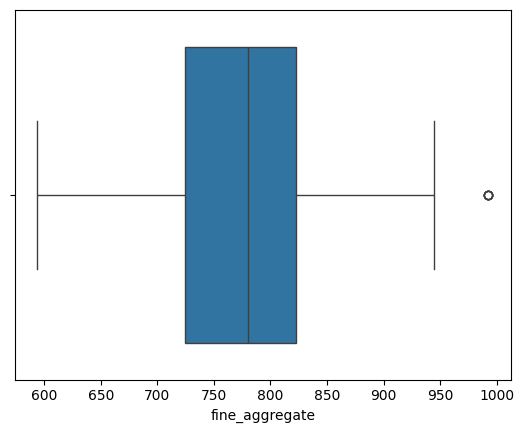

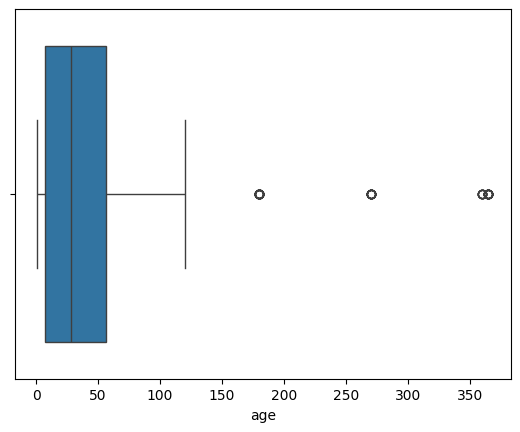

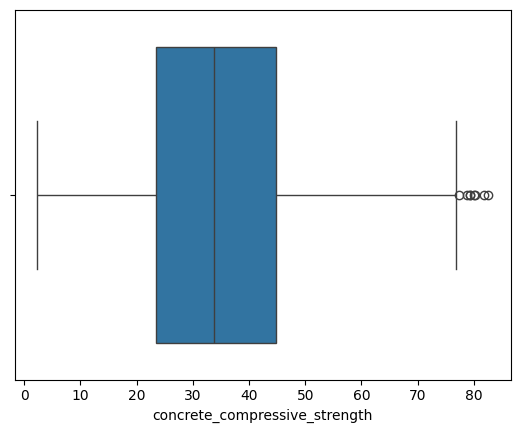

In [ ]:
for i in df.columns:
  sns.boxplot(data=df,x=i)
  plt.show()

In [ ]:
df.corr()

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
cement,1.000000,-0.303324,-0.385610,-0.056625,0.060906,-0.086205,-0.245375,0.086348,0.488283
blast_furnace_slag,-0.303324,1.000000,-0.312352,0.130262,0.019800,-0.277559,-0.289685,-0.042759,0.103374
fly_ash,-0.385610,-0.312352,1.000000,-0.283314,0.414213,-0.026468,0.090262,-0.158940,-0.080648
water,-0.056625,0.130262,-0.283314,1.000000,-0.646946,-0.212480,-0.444915,0.279284,-0.269624
superplasticizer,0.060906,0.019800,0.414213,-0.646946,1.000000,-0.241721,0.207993,-0.194076,0.344209
coarse_aggregate,-0.086205,-0.277559,-0.026468,-0.212480,-0.241721,1.000000,-0.162187,-0.005264,-0.144717
fine_aggregate,-0.245375,-0.289685,0.090262,-0.444915,0.207993,-0.162187,1.000000,-0.156572,-0.186448
age,0.086348,-0.042759,-0.158940,0.279284,-0.194076,-0.005264,-0.156572,1.000000,0.337367
concrete_compressive_strength,0.488283,0.103374,-0.080648,-0.269624,0.344209,-0.144717,-0.186448,0.337367,1.000000


<Axes: >

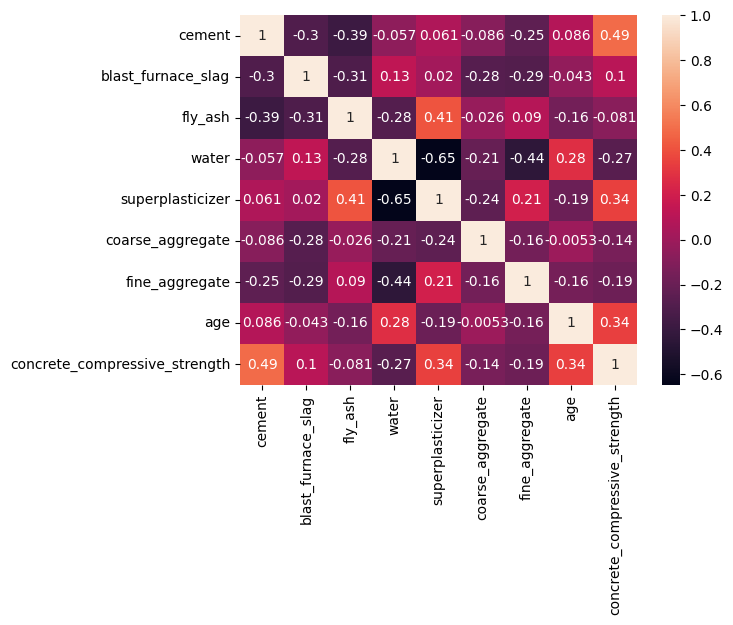

In [ ]:
sns.heatmap(df.corr(),annot=True)

In [ ]:
X=df.drop('concrete_compressive_strength',axis=1)
y=df['concrete_compressive_strength']

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=5)

In [37]:
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [41]:
reg=LinearRegression()
reg.fit(X_train_scaled,y_train)

LinearRegression()

In [45]:
ypred=reg.predict(X_test_scaled)
score=r2_score(y_test,ypred)
mse=mean_squared_error(y_test,ypred)
mae=mean_absolute_error(y_test,ypred)
print(score)
print(mse)
print(mae)

0.5719676830140707
101.0464229843187
8.077441204414122


In [47]:
df.skew()

,0
cement,0.564959
blast_furnace_slag,0.855225
fly_ash,0.497231
water,0.034433
superplasticizer,0.980604
coarse_aggregate,-0.065256
fine_aggregate,-0.252353
age,3.253974
concrete_compressive_strength,0.395696


In [48]:
pt=PowerTransformer(method='yeo-johnson')
X_train_pt=pt.fit_transform(X_train)
X_test_pt=pt.transform(X_test)

In [72]:
reg=LinearRegression()
reg.fit(X_train_pt,y_train)
ypred=reg.predict(X_test_pt)
score=r2_score(y_test,ypred)
mse=mean_squared_error(y_test,ypred)
mae=mean_absolute_error(y_test,ypred)
print('score:',score)
print('mse:',mse)
print('mae:',mae)

score: 0.8004683725477036
mse: 47.10382002991848
mae: 5.420663083316736


In [79]:
ridge=Ridge()
ridge.fit(X_train_pt,y_train)
ypred=ridge.predict(X_test_pt)
score=r2_score(y_test,ypred)
mse=mean_squared_error(y_test,ypred)
mae=mean_absolute_error(y_test,ypred)
print('mse:',mse)
print('mae:',mae)
print('score:',score)

mse: 47.123367111439364
mae: 5.422408888436624
score: 0.8003855711743686


In [77]:
lasso=Lasso()
lasso.fit(X_train_pt,y_train)
ypred=lasso.predict(X_test_pt)
score=r2_score(y_test,ypred)
mse=mean_squared_error(y_test,ypred)
mae=mean_absolute_error(y_test,ypred)
print('mse:',mse)
print('mae:',mae)
print('score:',score)

mse: 50.83660641166464
mae: 5.582504525140158
score: 0.7846563016539098


In [82]:
elasticnet=ElasticNet()
elasticnet.fit(X_train_pt,y_train)
ypred=elasticnet.predict(X_test_pt)
score=r2_score(y_test,ypred)
mse=mean_squared_error(y_test,ypred)
mae=mean_absolute_error(y_test,ypred)
print('mse:',mse)
print('mae:',mae)
print('score:',score)

mse: 76.77828197149003
mae: 6.999036994012064
score: 0.6747674489026103


In [84]:
ridgecv=RidgeCV(cv=5)
ridgecv.fit(X_train_pt,y_train)
ypred=ridgecv.predict(X_test_pt)
mse=mean_squared_error(y_test,ypred)
mae=mean_absolute_error(y_test,ypred)
score=r2_score(y_test,ypred)
print('score:',score)
print('mse:',mse)
print('mae:',mae)

score: 0.8003855711743686
mse: 47.123367111439364
mae: 5.422408888436624


In [88]:
linregcv=LinearRegression()
cv=KFold(n_splits=5,shuffle=True,random_state=5)
score=cross_val_score(linregcv,X_train_pt,y_train,cv=cv,scoring='r2')
print('score:',score.mean())

score: 0.7895783778986472


In [92]:
pickle.dump(reg,open('reg.pkl','wb'))
pickle.dump(pt,open('pt.pkl','wb'))